In [1]:
import numpy as np
import pandas as pd
from solvers.qcd import QCD
from multiprocessing import Pool, TimeoutError
from datetime import datetime
from scipy.fftpack import fft, ifft, fftfreq
from scipy.special import expit

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('pdf', 'png')
# plt.rcParams['savefig.dpi'] = 75
# plt.rcParams['figure.autolayout'] = False
# plt.rcParams['figure.figsize'] = 14, 8
# plt.rcParams['axes.labelsize'] = 18
# plt.rcParams['axes.titlesize'] = 20
# plt.rcParams['font.size'] = 16
# plt.rcParams['lines.linewidth'] = 2.0
# plt.rcParams['lines.markersize'] = 8
# plt.rcParams['legend.fontsize'] = 16
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = "serif"
# plt.rcParams['font.serif'] = "cm"

import seaborn as sns
sns.set()

plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 20

In [3]:
device = QCD(N=1024)

In [4]:
# device.turn_bias_on(bias=5, core_only=True)
#device.turn_bias_off()

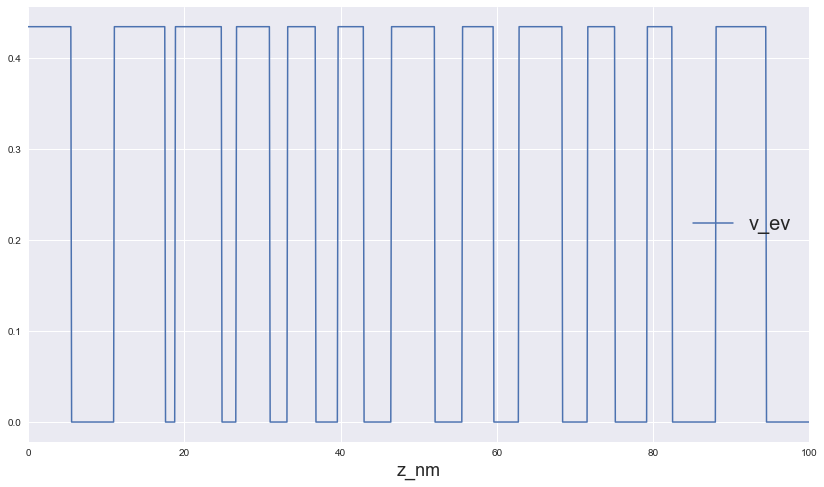

In [5]:
device.device.plot('z_nm', 'v_ev', grid=True, figsize=(14,8))

In [12]:
#info = device.turn_bias_on(bias=5, core_only=True).solve_eigen_problem(verbose=True).get_system_states()
info = device.solve_eigen_problem(verbose=True).get_system_states()
eigenvalues = np.array(info[1])
info[1]

Using values from stored file


[0.088309684889228898,
 0.15668427030477591,
 0.176622904099034,
 0.1967084620756368,
 0.24225921840725592,
 0.28136379025858682,
 0.3235819547242702,
 0.43023311216636739]

In [15]:
labels = [c for c in info[0].columns if c != 'z_nm' and c != 'v_ev' and c != 'm_eff']
labels

['state_0',
 'state_1',
 'state_2',
 'state_3',
 'state_4',
 'state_5',
 'state_6',
 'state_7']

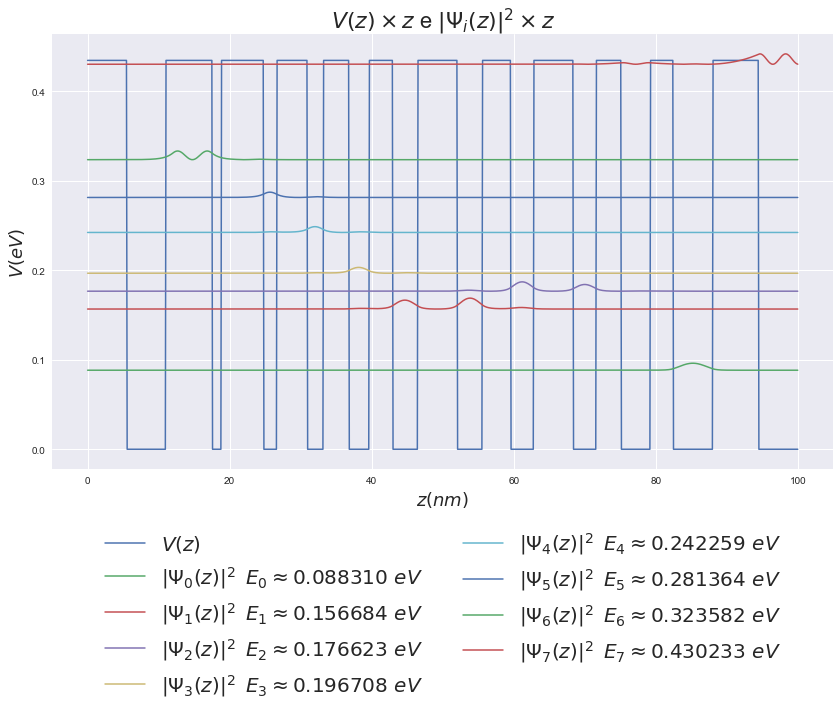

In [31]:
# info[0].plot(x='z_nm', y=states, grid=True, figsize=(14,8))
# plt.show()

device.device['state_6'] = device.device['state_6'][::-1]
device.device['state_7'] = device.device['state_7'][::-1]
info = device.get_system_states()

z_nm, V = info[0].z_nm, info[0].v_ev

fig, ax = plt.subplots()
ax.set_xlabel(r'$z (nm)$')
ax.set_ylabel(r'$V (eV)$')
ax.plot(z_nm, V, label=r'$V(z)$')

states = np.array([info[0][l] for l in labels], dtype=np.complex_)
for i, state in enumerate(states):
    state *= np.ptp(V) / np.ptp(np.abs(state)**2)/10
    if i == 6:
        state = state[::-1]
    _eivenvalue = eigenvalues[i]
    psi = (np.abs(state)**2).real + _eivenvalue
    ax.plot(z_nm, psi, label=r'$|\Psi_%d(z)|^2 \,\,\, E_%d \approx %.6f \,\, eV$' % (i, i, _eivenvalue))

ax.set_title(r"$V(z) \times z$ e $|\Psi_i(z)|^2 \times z$")
ax.grid(True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  shadow=True, ncol=2)
plt.show()
#plt.savefig('double_barrier_quantum_well_degani.png', bbox_inches='tight')

In [8]:
energies = np.linspace(0.1, 0.4, 300) # energy from 100 meV to 400 meV
photocurrent = []
def get_pc(energy):
    pc = device.photocurrent(energy=energy, dt=1e-17, ep_dyn=5.0)
    now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print("[%s] > Energy: %.6f eV, PC: %.6e " % (now, energy, pc))
    return pc
pool = Pool(processes=4)
photocurrent = pool.map(get_pc, energies)
# plt.plot(energies, photocurrent)
# plt.show()

[2018-07-23 17:22:55] > Energy: 0.100000 eV, PC: 1.180624e-15 
[2018-07-23 17:22:55] > Energy: 0.119064 eV, PC: 1.468569e-15 
[2018-07-23 17:22:56] > Energy: 0.157191 eV, PC: 5.580353e-14 
[2018-07-23 17:22:57] > Energy: 0.138127 eV, PC: 3.780078e-15 
[2018-07-23 17:23:40] > Energy: 0.101003 eV, PC: 1.184660e-15 
[2018-07-23 17:23:40] > Energy: 0.120067 eV, PC: 1.513472e-15 
[2018-07-23 17:23:41] > Energy: 0.158194 eV, PC: 3.169244e-14 
[2018-07-23 17:23:42] > Energy: 0.139130 eV, PC: 4.235436e-15 
[2018-07-23 17:24:25] > Energy: 0.102007 eV, PC: 1.187978e-15 
[2018-07-23 17:24:25] > Energy: 0.121070 eV, PC: 1.612399e-15 
[2018-07-23 17:24:26] > Energy: 0.159197 eV, PC: 2.382387e-14 
[2018-07-23 17:24:27] > Energy: 0.140134 eV, PC: 5.112617e-15 
[2018-07-23 17:25:09] > Energy: 0.103010 eV, PC: 1.191482e-15 
[2018-07-23 17:25:10] > Energy: 0.122074 eV, PC: 1.828260e-15 
[2018-07-23 17:25:12] > Energy: 0.160201 eV, PC: 1.905816e-14 
[2018-07-23 17:25:13] > Energy: 0.141137 eV, PC: 6.1912

[2018-07-23 17:47:01] > Energy: 0.246488 eV, PC: 1.255901e-15 
[2018-07-23 17:47:32] > Energy: 0.190301 eV, PC: 2.018511e-15 
[2018-07-23 17:47:32] > Energy: 0.209365 eV, PC: 1.369078e-15 
[2018-07-23 17:47:44] > Energy: 0.228428 eV, PC: 1.230928e-15 
[2018-07-23 17:47:47] > Energy: 0.247492 eV, PC: 1.260042e-15 
[2018-07-23 17:48:16] > Energy: 0.191304 eV, PC: 1.972854e-15 
[2018-07-23 17:48:16] > Energy: 0.210368 eV, PC: 1.357689e-15 
[2018-07-23 17:48:29] > Energy: 0.229431 eV, PC: 1.226513e-15 
[2018-07-23 17:48:32] > Energy: 0.248495 eV, PC: 1.266643e-15 
[2018-07-23 17:49:02] > Energy: 0.192308 eV, PC: 1.944142e-15 
[2018-07-23 17:49:02] > Energy: 0.211371 eV, PC: 1.346690e-15 
[2018-07-23 17:49:14] > Energy: 0.230435 eV, PC: 1.224155e-15 
[2018-07-23 17:49:16] > Energy: 0.249498 eV, PC: 1.271166e-15 
[2018-07-23 17:49:46] > Energy: 0.193311 eV, PC: 1.940589e-15 
[2018-07-23 17:49:47] > Energy: 0.212375 eV, PC: 1.329395e-15 
[2018-07-23 17:49:59] > Energy: 0.231438 eV, PC: 1.2256

[2018-07-23 18:11:44] > Energy: 0.374916 eV, PC: 1.243731e-15 
[2018-07-23 18:11:48] > Energy: 0.393980 eV, PC: 1.144151e-15 
[2018-07-23 18:12:12] > Energy: 0.337793 eV, PC: 2.739380e-15 
[2018-07-23 18:12:16] > Energy: 0.356856 eV, PC: 1.898178e-15 
[2018-07-23 18:12:29] > Energy: 0.375920 eV, PC: 1.233453e-15 
[2018-07-23 18:12:33] > Energy: 0.394983 eV, PC: 1.141690e-15 
[2018-07-23 18:12:58] > Energy: 0.338796 eV, PC: 2.762399e-15 
[2018-07-23 18:13:02] > Energy: 0.357860 eV, PC: 1.820056e-15 
[2018-07-23 18:13:15] > Energy: 0.376923 eV, PC: 1.224165e-15 
[2018-07-23 18:13:18] > Energy: 0.395987 eV, PC: 1.139667e-15 
[2018-07-23 18:13:43] > Energy: 0.339799 eV, PC: 2.779295e-15 
[2018-07-23 18:13:47] > Energy: 0.358863 eV, PC: 1.751539e-15 
[2018-07-23 18:14:00] > Energy: 0.377926 eV, PC: 1.214550e-15 
[2018-07-23 18:14:03] > Energy: 0.396990 eV, PC: 1.138616e-15 
[2018-07-23 18:14:28] > Energy: 0.340803 eV, PC: 2.794891e-15 
[2018-07-23 18:14:32] > Energy: 0.359866 eV, PC: 1.6897

In [12]:
 #ke = fftfreq(len(photocurrent), d=energies[1]-energies[0])
info[0]

,z_nm,state_0,state_1,state_2,state_3,state_4,state_5,state_6,state_7
0,0.000000,(1.972906011e-08+0j),(-2.23179588414e-10+0j),(-5.57193280826e-11+0j),(-1.54276114311e-08+0j),(8.12289531055e-07+0j),(1.75942934e-05+0j),(1.68826755143e-07+0j),(1.82722805398e-07+0j)
1,0.097752,(3.95720037598e-08+0j),(-4.47401201033e-10+0j),(-1.11680146116e-10+0j),(-3.09168787213e-08+0j),(1.62720360063e-06+0j),(3.5233873519e-05+0j),(3.37956460676e-07+0j),(3.65817339439e-07+0j)
2,0.195503,(5.96433718676e-08+0j),(-6.73711727266e-10+0j),(-1.68124990676e-10+0j),(-4.6529704135e-08+0j),(2.44737522721e-06+0j),(5.29641436414e-05+0j),(5.07692610626e-07+0j),(5.49655903695e-07+0j)
3,0.293255,(8.00590239037e-08+0j),(-9.0316780965e-10+0j),(-2.25298496128e-10+0j),(-6.23284837317e-08+0j),(3.27545441669e-06+0j),(7.08307404824e-05+0j),(6.78339787266e-07+0j),(7.34611946477e-07+0j)
4,0.391007,(1.00936806674e-07+0j),(-1.1368407773e-09+0j),(-2.83448454882e-10+0j),(-7.83763567291e-08+0j),(4.11411672455e-06+0j),(8.88796516548e-05+0j),(8.50204207679e-07+0j),(9.21060638381e-07+0j)
5,0.488759,(1.22397234577e-07+0j),(-1.37582164795e-09+0j),(-3.42826891331e-10+0j),(-9.4737457837e-08+0j),(4.96607190076e-06+0j),(0.000107157334038+0j),(1.02359427326e-06+0j),(1.10937945047e-06+0j)
6,0.586510,(1.44564185256e-07+0j),(-1.6212262219e-09+0j),(-4.03691154137e-10+0j),(-1.11477173569e-07+0j),(5.83407264505e-06+0j),(0.000125710833355+0j),(1.19882112312e-06+0j),(1.29994873594e-06+0j)
7,0.684262,(1.67565614672e-07+0j),(-1.87420029169e-09+0j),(-4.66305031585e-10+0j),(-1.28662403555e-07+0j),(6.720923501e-06+0j),(0.000144587905267+0j),(1.37619919244e-06+0j),(1.49315231623e-06+0j)
8,0.782014,(1.91534295707e-07+0j),(-2.13592499176e-09+0j),(-5.30939894857e-10+0j),(-1.46361827908e-07+0j),(7.62948991761e-06+0j),(0.000163837138292+0j),(1.55604677669e-06+0j),(1.68937807235e-06+0j)
9,0.879765,(2.16608584585e-07+0j),(-2.40762231324e-09+0j),(-5.97875874162e-10+0j),(-1.64646181695e-07+0j),(8.56270750767e-06+0j),(0.00018350807887+0j),(1.73868660282e-06+0j),(1.88901854242e-06+0j)


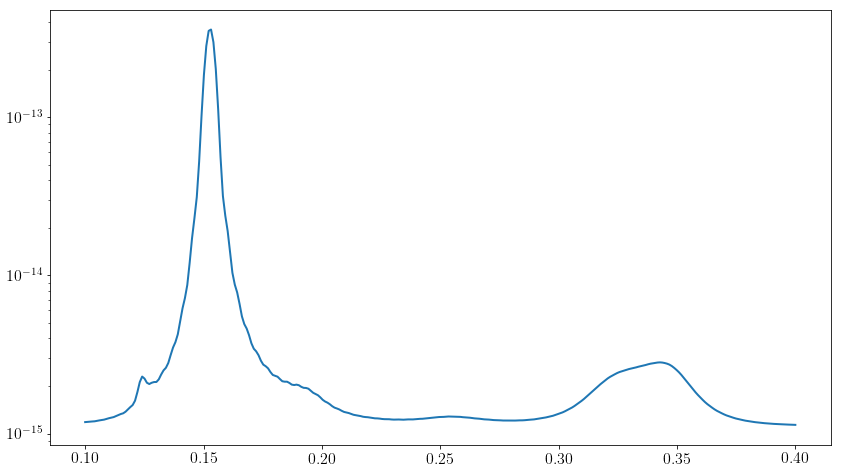

In [16]:
plt.semilogy(energies, photocurrent)
plt.show()

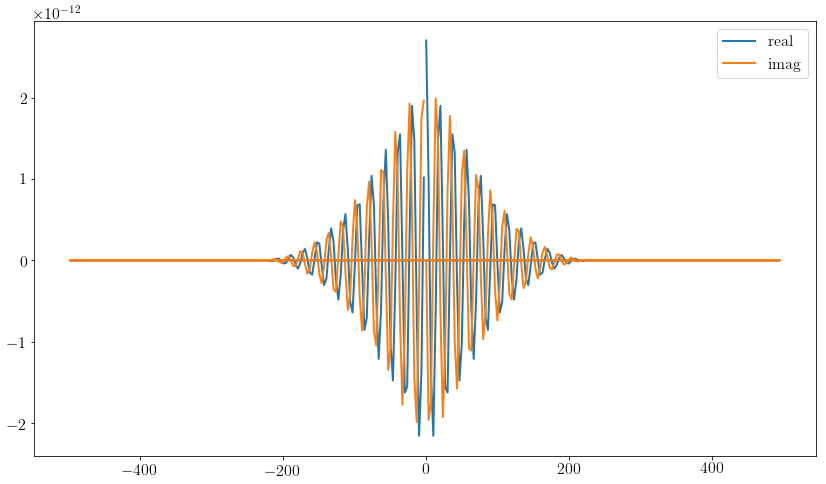

In [14]:
plt.plot(ke, fft(photocurrent).real, label='real')
plt.plot(ke, fft(photocurrent).imag, label='imag')
plt.legend()
plt.show()

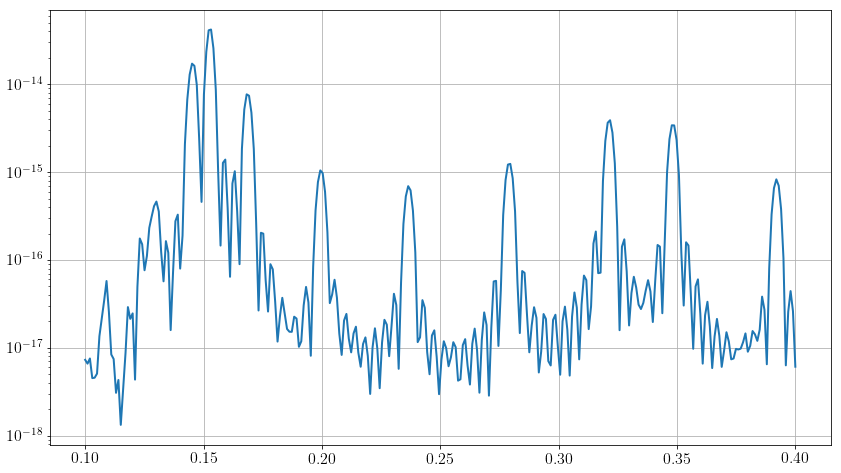

In [52]:
plt.semilogy(energies, np.abs(photocurrent))
plt.grid(True)
plt.show()

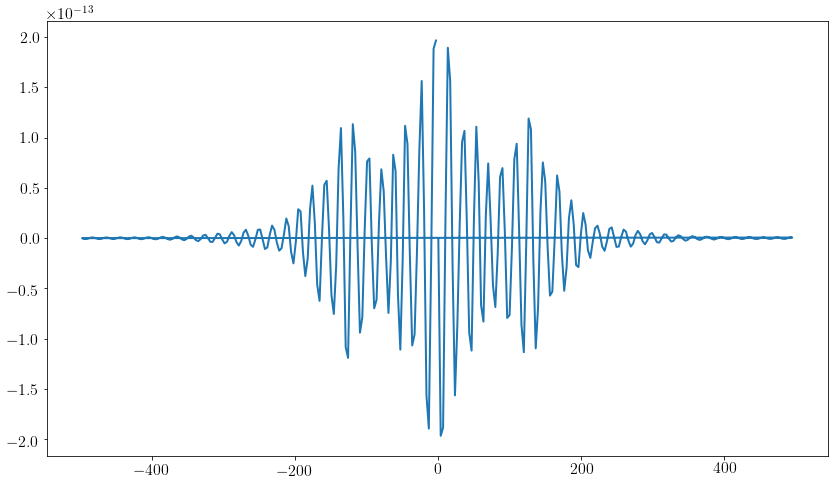

In [53]:
plt.plot(ke, fft(np.abs(photocurrent)).imag)
plt.show()

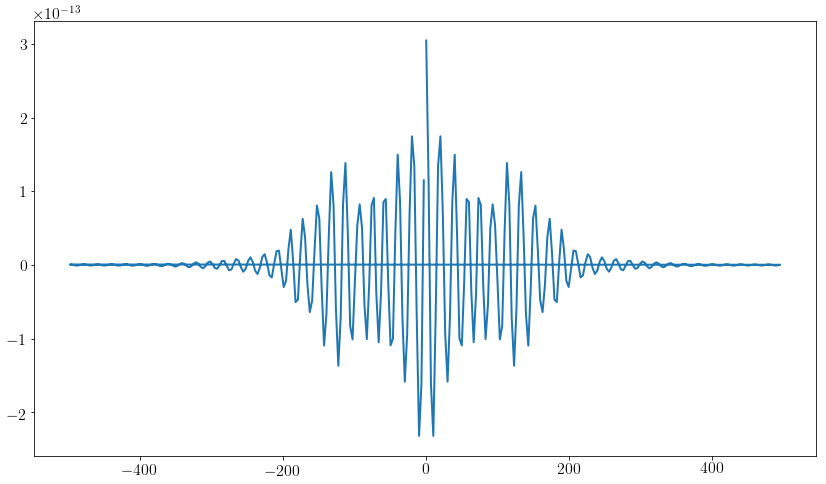

In [54]:
plt.plot(ke, fft(np.abs(photocurrent)).real)
plt.show()

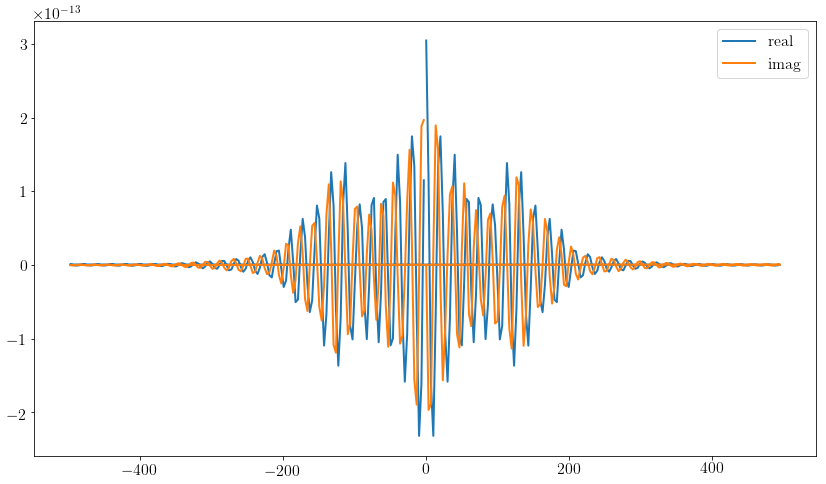

In [55]:
plt.plot(ke, fft(photocurrent).real, label='real')
plt.plot(ke, fft(photocurrent).imag, label='imag')
plt.legend()
plt.show()

/home/thiago/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


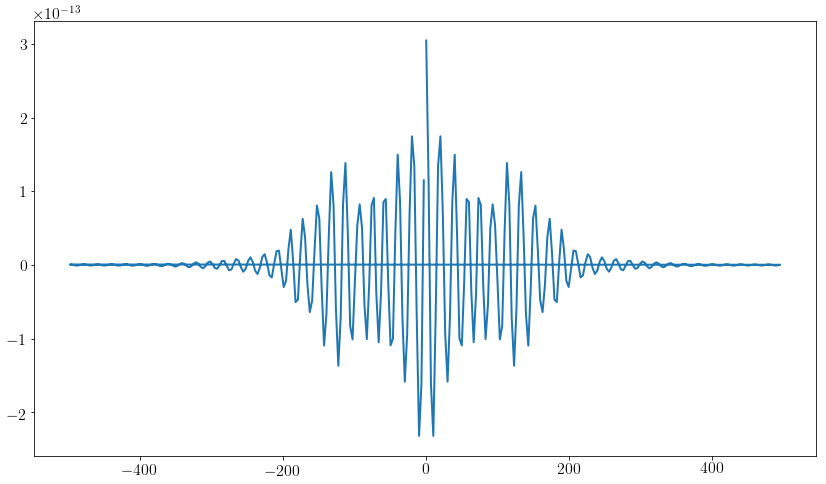

In [57]:
plt.plot(ke, fft(photocurrent))
plt.show()

In [46]:
for k,e in zip(ke, np.abs(fft(photocurrent))/10):
    print("k=%.4f, e=%.4e"%(k,e))

k=0.0000, e=1.8379e-12
k=3.3222, e=2.9817e-14
k=6.6444, e=1.5912e-13
k=9.9667, e=1.2325e-13
k=13.2889, e=2.0104e-13
k=16.6111, e=2.1452e-13
k=19.9333, e=1.5838e-13
k=23.2556, e=2.6896e-13
k=26.5778, e=1.8563e-13
k=29.9000, e=2.6305e-13
k=33.2222, e=2.0166e-13
k=36.5444, e=2.2474e-13
k=39.8667, e=1.9932e-13
k=43.1889, e=2.0453e-13
k=46.5111, e=1.5211e-13
k=49.8333, e=1.7479e-13
k=53.1556, e=2.5720e-13
k=56.4778, e=1.7017e-13
k=59.8000, e=1.7761e-13
k=63.1222, e=1.2793e-13
k=66.4444, e=1.1157e-13
k=69.7667, e=1.7626e-13
k=73.0889, e=1.5684e-13
k=76.4111, e=1.7189e-13
k=79.7333, e=9.5612e-14
k=83.0556, e=9.7064e-14
k=86.3778, e=7.6044e-14
k=89.7000, e=1.6506e-13
k=93.0222, e=1.4355e-13
k=96.3444, e=1.4731e-13
k=99.6667, e=1.5715e-13
k=102.9889, e=1.0341e-13
k=106.3111, e=8.3903e-14
k=109.6333, e=4.9492e-14
k=112.9556, e=4.7340e-14
k=116.2778, e=2.8679e-14
k=119.6000, e=7.9647e-14
k=122.9222, e=2.1585e-14
k=126.2444, e=6.8887e-14
k=129.5667, e=3.7290e-14
k=132.8889, e=2.6629e-14
k=136.2111

In [47]:
#photocurrent_old = photocurrent.copy()

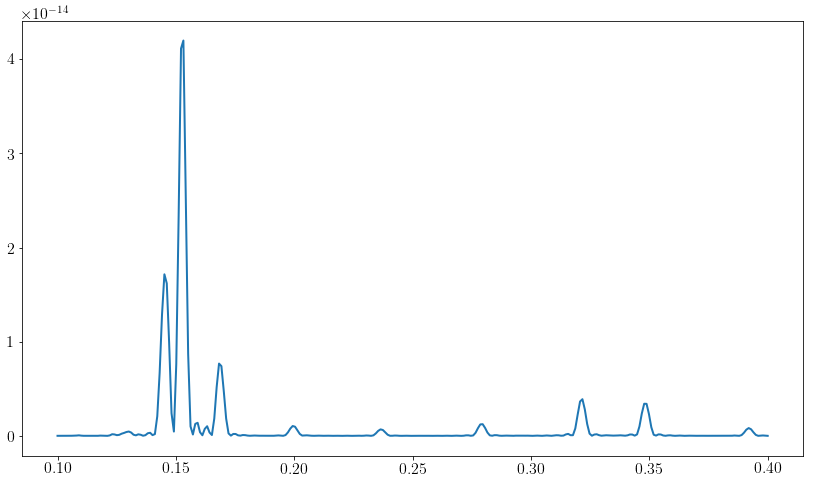

In [59]:
plt.plot(energies, photocurrent)
plt.show()

/home/thiago/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


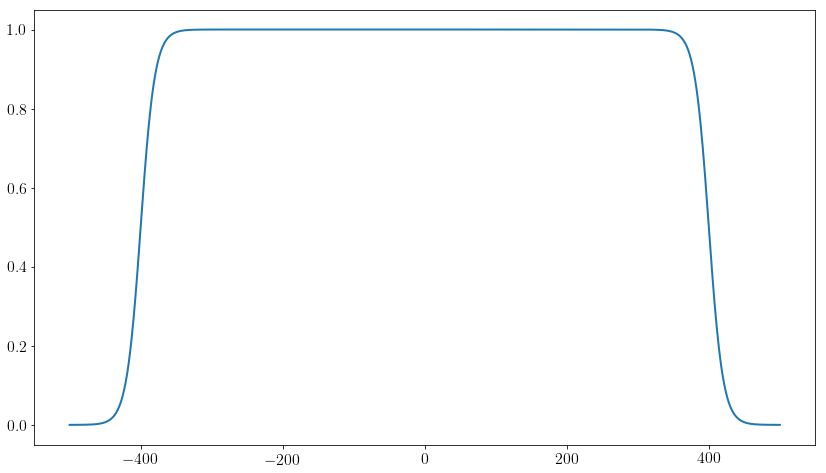

In [19]:
L = 1000.0
N = 1024
z = np.linspace(-L/2,L/2,N)
killer = np.array([min(l,r) for l,r in zip(expit((400-z)/10), expit((z+400)/10))], dtype=np.complex_)
plt.plot(z,killer)
plt.show()

In [22]:
v = [0.088309684889228898,
 0.15668427030477591,
 0.176622904099034,
 0.1967084620756368,
 0.24225921840725592,
 0.28136379025858682,
 0.3235819547242702,
 0.43023311216636739]

for i in range(len(v)-1):
    print(v[i+1]-v[i])

0.06837458541554702
0.019938633794258087
0.020085557976602803
0.04555075633161912
0.0391045718513309
0.04221816446568338
0.10665115744209719
